<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/singlcecell_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A notebook to teach unsupervised machine learning using single cell data

Install required packages

In [6]:
!pip install scanpy anndata matplotlib seaborn igraph leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00


* Loads real single-cell transcriptome data from 10x Genomics

* Performs standard preprocessing

* Reduces dimensions using t-SNE

* Clusters cells using Leiden (or you could use Louvain)

* Visualizes the result with t-SNE embedding

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.11/functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
<ipython-input-7-953ce7fc70e1>:30: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


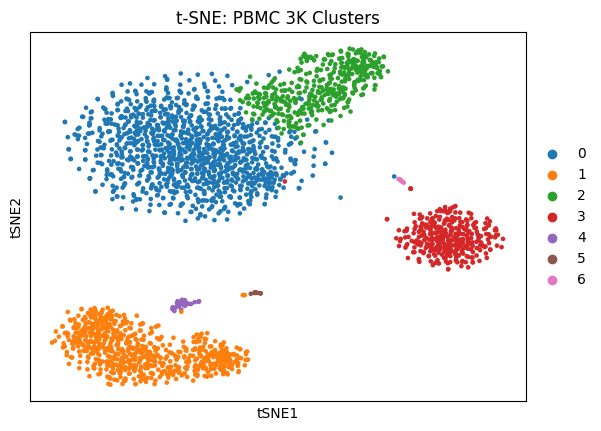

In [7]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the PBMC 3K dataset
adata = sc.datasets.pbmc3k()

# Step 2: Preprocessing
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # Identify mitochondrial genes
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Step 3: Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Step 4: Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

# Step 5: Scale data and perform PCA
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

# Step 6: Nearest neighbors and clustering (e.g., Louvain)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.tsne(adata, n_pcs=40)
sc.tl.leiden(adata, resolution=0.5)

# Step 7: Plot t-SNE colored by cluster
sc.pl.tsne(adata, color=['leiden'], title='t-SNE: PBMC 3K Clusters')

# Optional: See UMAP as well
# sc.pl.umap(adata, color=['leiden'], title='UMAP: PBMC 3K Clusters')
